In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score, confusion_matrix

In [2]:
data = pd.read_csv("loan approval data.csv")
data

,Applicant_ID,Applicant_Income,Coapplicant_Income,Employment_Status,Age,Marital_Status,Dependents,Credit_Score,Existing_Loans,DTI_Ratio,Savings,Collateral_Value,Loan_Amount,Loan_Term,Loan_Purpose,Property_Area,Education_Level,Gender,Employer_Category,Loan_Approved
0,1.0,17795.0,1387.0,Salaried,51.0,Married,0.0,637.0,4.0,0.53,19403.0,45638.0,16619.0,84.0,Personal,Urban,Not Graduate,Female,Private,No
1,2.0,2860.0,2679.0,Salaried,46.0,Married,3.0,621.0,2.0,0.30,2580.0,49272.0,38687.0,NaN,Car,Semiurban,Graduate,NaN,Private,No
2,3.0,7390.0,2106.0,Salaried,25.0,Single,2.0,674.0,4.0,0.20,13844.0,6908.0,27943.0,72.0,NaN,Urban,NaN,Female,Government,Yes
3,4.0,13964.0,8173.0,Salaried,40.0,Married,2.0,579.0,3.0,0.31,9553.0,10844.0,27819.0,60.0,Business,Rural,Graduate,Female,Government,No
4,5.0,13284.0,4223.0,Self-employed,31.0,Single,2.0,721.0,1.0,0.29,9386.0,37629.0,12741.0,72.0,Car,NaN,Graduate,Male,Private,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996.0,NaN,9092.0,Salaried,58.0,Married,0.0,557.0,0.0,0.59,5370.0,43563.0,8311.0,72.0,Personal,NaN,Not Graduate,Male,Unemployed,No
996,997.0,3279.0,6356.0,Self-employed,58.0,Married,1.0,646.0,3.0,0.19,NaN,18361.0,22563.0,12.0,Business,Urban,Graduate,Female,Government,No
997,998.0,15192.0,8433.0,Contract,48.0,Single,1.0,666.0,1.0,0.40,8581.0,41335.0,16203.0,24.0,Home,Rural,Graduate,Male,MNC,No
998,999.0,9083.0,7380.0,Unemployed,50.0,Single,1.0,748.0,3.0,0.31,13491.0,8933.0,10290.0,36.0,Personal,Urban,Graduate,Male,Private,Yes


In [3]:
#Seperating Numerical and Categorical columns

categorical_cols = data.select_dtypes(include=["object"]).columns
numerical_cols = data.select_dtypes(include=["float64"]).columns


In [4]:
categorical_cols

Index(['Employment_Status', 'Marital_Status', 'Loan_Purpose', 'Property_Area',
       'Education_Level', 'Gender', 'Employer_Category', 'Loan_Approved'],
      dtype='object')

In [5]:
numerical_cols

Index(['Applicant_ID', 'Applicant_Income', 'Coapplicant_Income', 'Age',
       'Dependents', 'Credit_Score', 'Existing_Loans', 'DTI_Ratio', 'Savings',
       'Collateral_Value', 'Loan_Amount', 'Loan_Term'],
      dtype='object')

In [6]:
#Handling Missing Values

from sklearn.impute import SimpleImputer

num_imp = SimpleImputer(strategy="mean")
data[numerical_cols] = num_imp.fit_transform(data[numerical_cols])

cat_imp = SimpleImputer(strategy="most_frequent")
data[categorical_cols] = cat_imp.fit_transform(data[categorical_cols])

In [7]:
data

,Applicant_ID,Applicant_Income,Coapplicant_Income,Employment_Status,Age,Marital_Status,Dependents,Credit_Score,Existing_Loans,DTI_Ratio,Savings,Collateral_Value,Loan_Amount,Loan_Term,Loan_Purpose,Property_Area,Education_Level,Gender,Employer_Category,Loan_Approved
0,1.0,17795.000000,1387.0,Salaried,51.0,Married,0.0,637.0,4.0,0.53,19403.000000,45638.0,16619.0,84.0,Personal,Urban,Not Graduate,Female,Private,No
1,2.0,2860.000000,2679.0,Salaried,46.0,Married,3.0,621.0,2.0,0.30,2580.000000,49272.0,38687.0,48.0,Car,Semiurban,Graduate,Male,Private,No
2,3.0,7390.000000,2106.0,Salaried,25.0,Single,2.0,674.0,4.0,0.20,13844.000000,6908.0,27943.0,72.0,Business,Urban,Graduate,Female,Government,Yes
3,4.0,13964.000000,8173.0,Salaried,40.0,Married,2.0,579.0,3.0,0.31,9553.000000,10844.0,27819.0,60.0,Business,Rural,Graduate,Female,Government,No
4,5.0,13284.000000,4223.0,Self-employed,31.0,Single,2.0,721.0,1.0,0.29,9386.000000,37629.0,12741.0,72.0,Car,Urban,Graduate,Male,Private,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996.0,10852.571579,9092.0,Salaried,58.0,Married,0.0,557.0,0.0,0.59,5370.000000,43563.0,8311.0,72.0,Personal,Urban,Not Graduate,Male,Unemployed,No
996,997.0,3279.000000,6356.0,Self-employed,58.0,Married,1.0,646.0,3.0,0.19,9940.452632,18361.0,22563.0,12.0,Business,Urban,Graduate,Female,Government,No
997,998.0,15192.000000,8433.0,Contract,48.0,Single,1.0,666.0,1.0,0.40,8581.000000,41335.0,16203.0,24.0,Home,Rural,Graduate,Male,MNC,No
998,999.0,9083.000000,7380.0,Unemployed,50.0,Single,1.0,748.0,3.0,0.31,13491.000000,8933.0,10290.0,36.0,Personal,Urban,Graduate,Male,Private,Yes


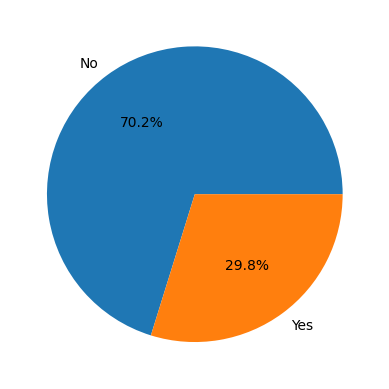

In [8]:
#how balanced our data is
count = data["Loan_Approved"].value_counts()

plt.pie(count, labels=["No","Yes"],autopct="%1.1f%%")
plt.show()

[Text(0, 0, '517'), Text(0, 0, '294'), Text(0, 0, '189')]

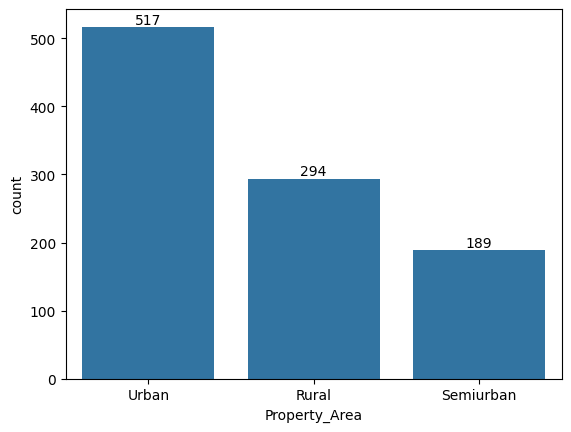

In [9]:
# gender_count = data["Gender"].value_counts()

# sns.barplot(gender_count)
prop_count = data["Property_Area"].value_counts()

ax = sns.barplot(prop_count)
ax.bar_label(ax.containers[0])

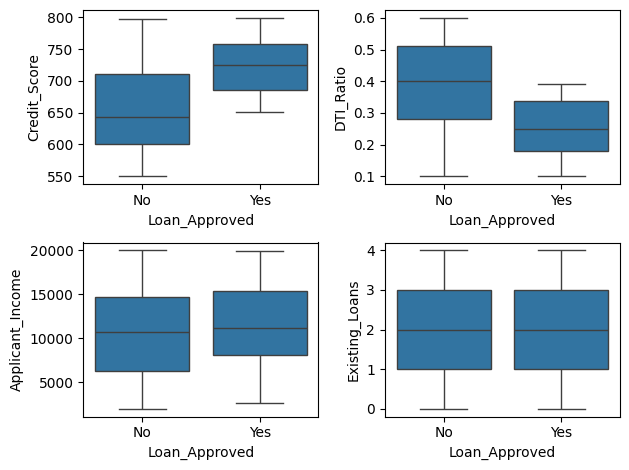

In [10]:
fig, axes = plt.subplots(2,2)

sns.boxplot(ax=axes[0,0],data=data, x="Loan_Approved",y="Credit_Score")
sns.boxplot(ax=axes[0,1],data=data, x="Loan_Approved",y="DTI_Ratio")
sns.boxplot(ax=axes[1,0],data=data, x="Loan_Approved",y="Applicant_Income")
sns.boxplot(ax=axes[1,1],data=data, x="Loan_Approved",y="Existing_Loans")
plt.tight_layout()

<Axes: xlabel='Credit_Score', ylabel='Count'>

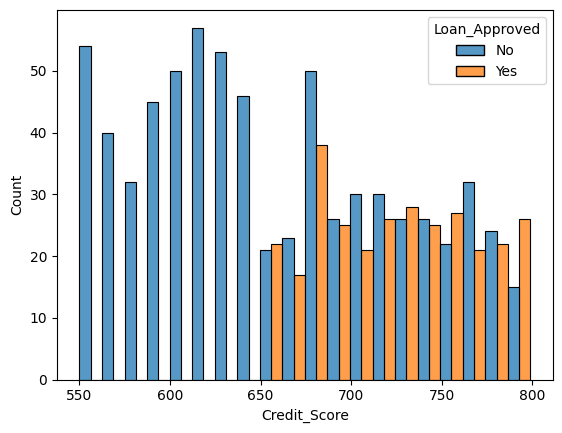

In [11]:
sns.histplot(
    data=data,
    x="Credit_Score",
    hue="Loan_Approved",
    bins=20,
    multiple="dodge"
)

In [12]:
#Remove uncessary features
data =data.drop(columns=["Applicant_ID"])

In [13]:
data.columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Applicant_Income    1000 non-null   float64
 1   Coapplicant_Income  1000 non-null   float64
 2   Employment_Status   1000 non-null   object 
 3   Age                 1000 non-null   float64
 4   Marital_Status      1000 non-null   object 
 5   Dependents          1000 non-null   float64
 6   Credit_Score        1000 non-null   float64
 7   Existing_Loans      1000 non-null   float64
 8   DTI_Ratio           1000 non-null   float64
 9   Savings             1000 non-null   float64
 10  Collateral_Value    1000 non-null   float64
 11  Loan_Amount         1000 non-null   float64
 12  Loan_Term           1000 non-null   float64
 13  Loan_Purpose        1000 non-null   object 
 14  Property_Area       1000 non-null   object 
 15  Education_Level     1000 non-null   object 
 16  Gender 

In [14]:
#Encoding using OneHotEncoding and LabelEncoding
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

le = LabelEncoder()
data["Education_Level"] = le.fit_transform(data["Education_Level"])
data["Employer_Category"] = le.fit_transform(data["Employer_Category"]) 
data["Loan_Approved"] = le.fit_transform(data["Loan_Approved"])
data.head()

,Applicant_Income,Coapplicant_Income,Employment_Status,Age,Marital_Status,Dependents,Credit_Score,Existing_Loans,DTI_Ratio,Savings,Collateral_Value,Loan_Amount,Loan_Term,Loan_Purpose,Property_Area,Education_Level,Gender,Employer_Category,Loan_Approved
0,17795.0,1387.0,Salaried,51.0,Married,0.0,637.0,4.0,0.53,19403.0,45638.0,16619.0,84.0,Personal,Urban,1,Female,3,0
1,2860.0,2679.0,Salaried,46.0,Married,3.0,621.0,2.0,0.30,2580.0,49272.0,38687.0,48.0,Car,Semiurban,0,Male,3,0
2,7390.0,2106.0,Salaried,25.0,Single,2.0,674.0,4.0,0.20,13844.0,6908.0,27943.0,72.0,Business,Urban,0,Female,1,1
3,13964.0,8173.0,Salaried,40.0,Married,2.0,579.0,3.0,0.31,9553.0,10844.0,27819.0,60.0,Business,Rural,0,Female,1,0
4,13284.0,4223.0,Self-employed,31.0,Single,2.0,721.0,1.0,0.29,9386.0,37629.0,12741.0,72.0,Car,Urban,0,Male,3,1


In [15]:

cols = ["Employment_Status","Marital_Status","Loan_Purpose","Property_Area","Gender"]

oh = OneHotEncoder(drop="first",sparse_output=False, handle_unknown="ignore")

encoded = oh.fit_transform(data[cols])

encoded_df = pd.DataFrame(encoded, columns=oh.get_feature_names_out(cols))

data = pd.concat([data.drop(columns=cols),encoded_df],axis=1)



In [16]:
data.head()

,Applicant_Income,Coapplicant_Income,Age,Dependents,Credit_Score,Existing_Loans,DTI_Ratio,Savings,Collateral_Value,Loan_Amount,...,Employment_Status_Self-employed,Employment_Status_Unemployed,Marital_Status_Single,Loan_Purpose_Car,Loan_Purpose_Education,Loan_Purpose_Home,Loan_Purpose_Personal,Property_Area_Semiurban,Property_Area_Urban,Gender_Male
0,17795.0,1387.0,51.0,0.0,637.0,4.0,0.53,19403.0,45638.0,16619.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,2860.0,2679.0,46.0,3.0,621.0,2.0,0.30,2580.0,49272.0,38687.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
2,7390.0,2106.0,25.0,2.0,674.0,4.0,0.20,13844.0,6908.0,27943.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,13964.0,8173.0,40.0,2.0,579.0,3.0,0.31,9553.0,10844.0,27819.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,13284.0,4223.0,31.0,2.0,721.0,1.0,0.29,9386.0,37629.0,12741.0,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0


In [17]:
#Correlation Matrix

new_cols = data.select_dtypes(include="number")
matrix = new_cols.corr()
matrix

,Applicant_Income,Coapplicant_Income,Age,Dependents,Credit_Score,Existing_Loans,DTI_Ratio,Savings,Collateral_Value,Loan_Amount,...,Employment_Status_Self-employed,Employment_Status_Unemployed,Marital_Status_Single,Loan_Purpose_Car,Loan_Purpose_Education,Loan_Purpose_Home,Loan_Purpose_Personal,Property_Area_Semiurban,Property_Area_Urban,Gender_Male
Applicant_Income,1.000000,0.007545,-0.023988,-0.026658,-0.009818,-0.010457,-0.009107,-0.028358,0.018789,-0.024143,...,0.005609,0.001419,0.010057,-0.083398,0.032794,0.074209,-0.031234,0.004845,-0.036260,-0.020871
Coapplicant_Income,0.007545,1.000000,0.014306,-0.026733,0.058423,0.012418,0.058078,-0.015047,0.009457,0.001596,...,-0.010462,0.023114,-0.011431,-0.020148,0.028000,0.016022,0.059549,-0.010058,0.030045,-0.010148
Age,-0.023988,0.014306,1.000000,-0.018767,-0.004212,0.023330,0.007903,-0.000986,0.037382,0.013502,...,-0.011743,-0.009866,0.009162,-0.025521,-0.006283,0.029865,0.037293,0.003100,-0.025661,0.048402
Dependents,-0.026658,-0.026733,-0.018767,1.000000,-0.007687,-0.026338,0.011498,-0.004981,0.023004,-0.017409,...,0.079136,0.000396,-0.011410,-0.043685,-0.044642,0.027343,-0.005785,-0.032278,0.024082,0.013706
Credit_Score,-0.009818,0.058423,-0.004212,-0.007687,1.000000,-0.007130,0.002338,-0.065353,0.007865,0.001002,...,-0.035896,-0.008344,0.056176,-0.030142,0.026013,-0.008658,0.015324,-0.006946,0.004445,-0.039739
Existing_Loans,-0.010457,0.012418,0.023330,-0.026338,-0.007130,1.000000,0.047008,0.034435,-0.049916,-0.021035,...,0.042772,-0.012356,0.018010,-0.025228,-0.010035,0.001777,0.023212,-0.053971,0.035629,-0.038762
DTI_Ratio,-0.009107,0.058078,0.007903,0.011498,0.002338,0.047008,1.000000,0.004663,-0.009622,0.075784,...,-0.043904,0.022318,-0.014850,-0.020907,0.040432,-0.014125,-0.036648,0.044898,-0.006156,0.009624
Savings,-0.028358,-0.015047,-0.000986,-0.004981,-0.065353,0.034435,0.004663,1.000000,0.015481,-0.012208,...,0.000668,0.006304,-0.004131,-0.009133,0.032558,-0.012217,-0.028948,0.005438,0.016833,-0.006667
Collateral_Value,0.018789,0.009457,0.037382,0.023004,0.007865,-0.049916,-0.009622,0.015481,1.000000,0.002660,...,0.000119,-0.041632,0.018450,0.031112,0.040406,-0.050975,-0.007120,0.020061,0.007975,0.000897
Loan_Amount,-0.024143,0.001596,0.013502,-0.017409,0.001002,-0.021035,0.075784,-0.012208,0.002660,1.000000,...,-0.072972,-0.007407,0.004683,-0.006788,-0.006119,-0.000930,0.032498,0.040206,-0.050076,0.103456


In [18]:
new_cols.corr()["Loan_Approved"].sort_values(ascending=False)

Loan_Approved                      1.000000
Credit_Score                       0.451175
Applicant_Income                   0.119796
Loan_Purpose_Personal              0.034043
Marital_Status_Single              0.030182
Property_Area_Urban                0.025963
Collateral_Value                   0.021868
Coapplicant_Income                 0.004230
Loan_Purpose_Home                  0.002118
Employer_Category                  0.001922
Employment_Status_Self-employed   -0.001337
Property_Area_Semiurban           -0.012967
Savings                           -0.013437
Loan_Purpose_Education            -0.016684
Age                               -0.022343
Dependents                        -0.023811
Existing_Loans                    -0.034794
Employment_Status_Salaried        -0.041428
Employment_Status_Unemployed      -0.044464
Education_Level                   -0.052920
Gender_Male                       -0.054342
Loan_Purpose_Car                  -0.056416
Loan_Term                       

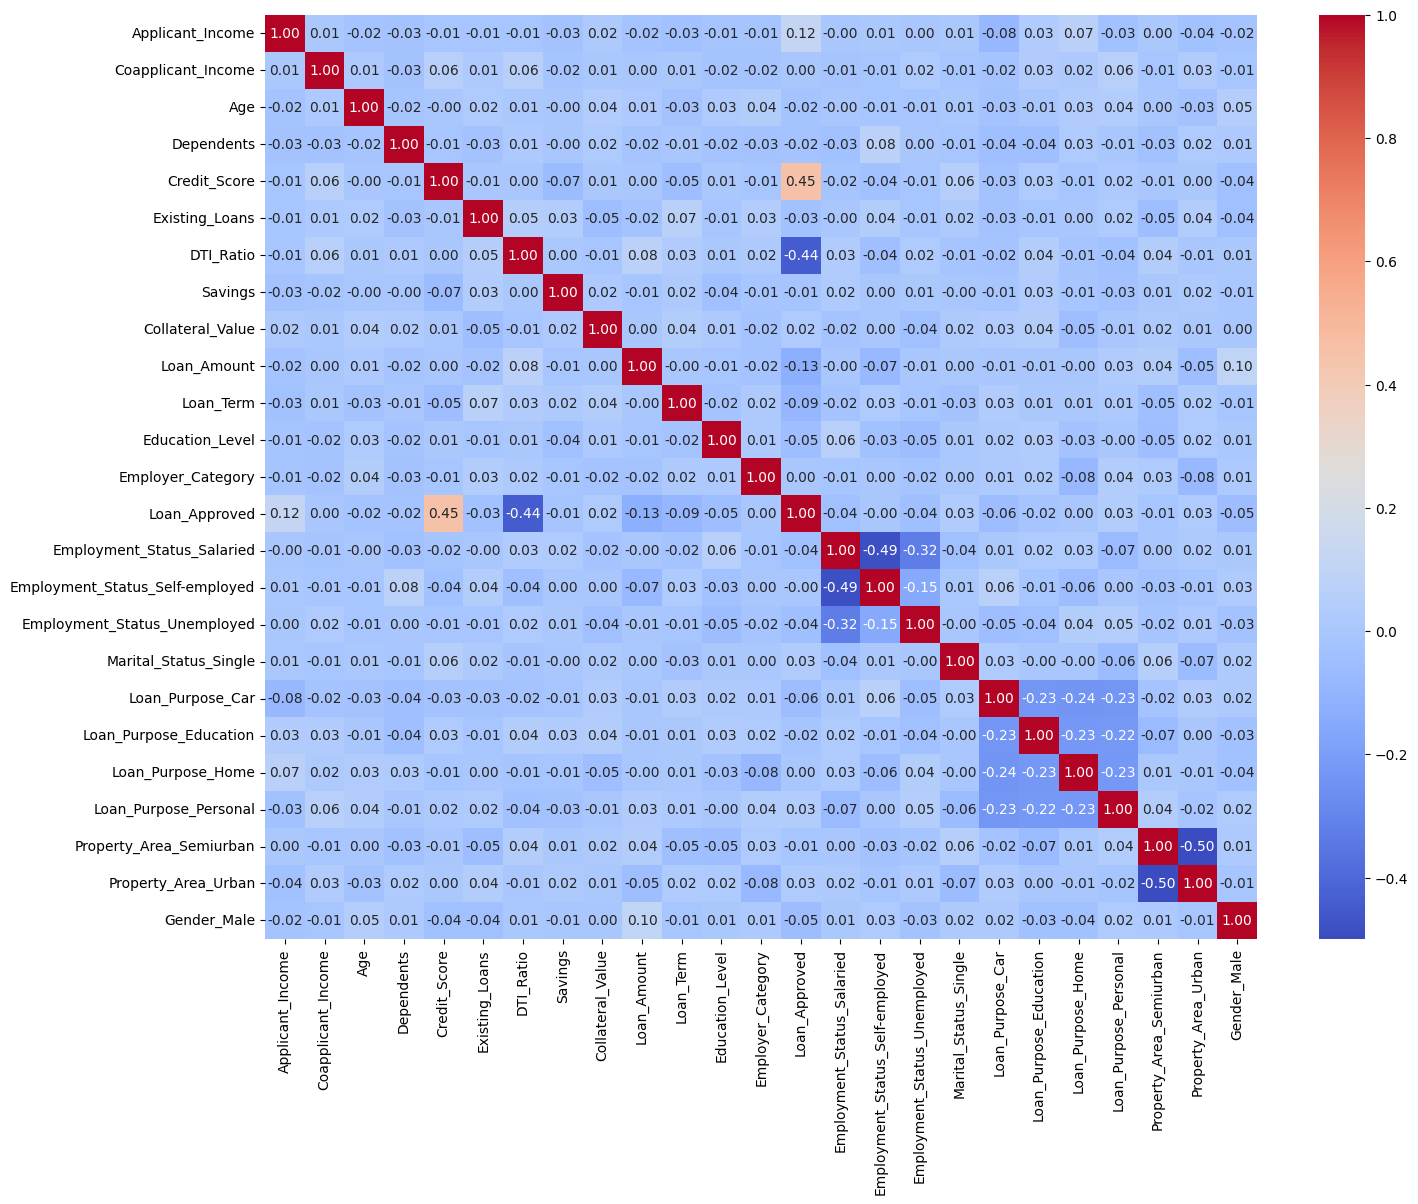

In [19]:
plt.figure(figsize=(16,12))
sns.heatmap(
    matrix,
    fmt=".2f",
    annot=True,
    cmap="coolwarm"
)
plt.show()

In [20]:
#Training the data

X = data.drop("Loan_Approved",axis=1)
y = data["Loan_Approved"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.head()

,Applicant_Income,Coapplicant_Income,Age,Dependents,Credit_Score,Existing_Loans,DTI_Ratio,Savings,Collateral_Value,Loan_Amount,...,Employment_Status_Self-employed,Employment_Status_Unemployed,Marital_Status_Single,Loan_Purpose_Car,Loan_Purpose_Education,Loan_Purpose_Home,Loan_Purpose_Personal,Property_Area_Semiurban,Property_Area_Urban,Gender_Male
29,5890.000000,8041.0,31.000000,0.0,603.000000,0.000000,0.11,11906.0,8150.000000,29287.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
535,4779.000000,529.0,50.000000,0.0,614.000000,0.000000,0.21,5369.0,5430.000000,14786.000000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
695,10852.571579,8927.0,36.000000,0.0,584.000000,4.000000,0.22,3186.0,24802.792632,20522.825263,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
557,2384.000000,2113.0,39.971579,1.0,726.000000,4.000000,0.34,11882.0,48542.000000,13312.000000,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
836,5228.000000,5249.0,42.000000,1.0,676.033684,1.950526,0.18,17669.0,24802.792632,13906.000000,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [21]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [25]:
from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()

nb_model.fit(X_train_scaled, y_train)

y_pred = nb_model.predict(X_test_scaled)

acc = accuracy_score(y_test, y_pred)
print("Accuracy Score = ",acc)

pre = precision_score(y_test, y_pred)
print("Precision Score = ",pre)

f1 = f1_score(y_test, y_pred)
print("f1 Score = ",f1)

recall = recall_score(y_test, y_pred)
print("recall Score = ",recall)

CM = confusion_matrix(y_test, y_pred)
print("confusion_matrix = \n",CM)

Accuracy Score =  0.865
Precision Score =  0.8035714285714286
f1 Score =  0.7692307692307693
recall Score =  0.7377049180327869
confusion_matrix = 
 [[128  11]
 [ 16  45]]


In [26]:
#Feature Engineering

#Add or Transform features

data["Credit_Score_new"]= data["Credit_Score"] ** 2
data["DTI_Ratio_new"] = data["DTI_Ratio"] ** 2

data["Applicant_Income_log"] = np.log1p(data["Applicant_Income"])

X = data.drop(columns=["Loan_Approved","Credit_Score"])
y = data["Loan_Approved"]

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.head()

,Applicant_Income,Coapplicant_Income,Age,Dependents,Existing_Loans,DTI_Ratio,Savings,Collateral_Value,Loan_Amount,Loan_Term,...,Loan_Purpose_Car,Loan_Purpose_Education,Loan_Purpose_Home,Loan_Purpose_Personal,Property_Area_Semiurban,Property_Area_Urban,Gender_Male,Credit_Score_new,DTI_Ratio_new,Applicant_Income_log
29,5890.000000,8041.0,31.000000,0.0,0.000000,0.11,11906.0,8150.000000,29287.000000,12.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,363609.000000,0.0121,8.681181
535,4779.000000,529.0,50.000000,0.0,0.000000,0.21,5369.0,5430.000000,14786.000000,72.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,376996.000000,0.0441,8.472196
695,10852.571579,8927.0,36.000000,0.0,4.000000,0.22,3186.0,24802.792632,20522.825263,48.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,341056.000000,0.0484,9.292249
557,2384.000000,2113.0,39.971579,1.0,4.000000,0.34,11882.0,48542.000000,13312.000000,24.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,527076.000000,0.1156,7.776954
836,5228.000000,5249.0,42.000000,1.0,1.950526,0.18,17669.0,24802.792632,13906.000000,84.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,457021.542187,0.0324,8.561975


In [29]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

acc = accuracy_score(y_test, y_pred)
print("Accuracy Score = ",acc)

pre = precision_score(y_test, y_pred)
print("Precision Score = ",pre)

f1 = f1_score(y_test, y_pred)
print("f1 Score = ",f1)

recall = recall_score(y_test, y_pred)
print("recall Score = ",recall)

CM = confusion_matrix(y_test, y_pred)
print("confusion_matrix = \n",CM)

Accuracy Score =  0.885
Precision Score =  0.8275862068965517
f1 Score =  0.8067226890756303
recall Score =  0.7868852459016393
confusion_matrix = 
 [[129  10]
 [ 13  48]]


In [31]:
import pickle

# Save model
pickle.dump(model, open("loan_model.pkl", "wb"))

# Save scaler
pickle.dump(scaler, open("scaler.pkl", "wb"))


In [34]:
feature_names = X.columns.tolist()

pickle.dump(feature_names, open("feature_names.pkl", "wb"))

In [35]:
X.columns

Index(['Applicant_Income', 'Coapplicant_Income', 'Age', 'Dependents',
       'Existing_Loans', 'DTI_Ratio', 'Savings', 'Collateral_Value',
       'Loan_Amount', 'Loan_Term', 'Education_Level', 'Employer_Category',
       'Employment_Status_Salaried', 'Employment_Status_Self-employed',
       'Employment_Status_Unemployed', 'Marital_Status_Single',
       'Loan_Purpose_Car', 'Loan_Purpose_Education', 'Loan_Purpose_Home',
       'Loan_Purpose_Personal', 'Property_Area_Semiurban',
       'Property_Area_Urban', 'Gender_Male', 'Credit_Score_new',
       'DTI_Ratio_new', 'Applicant_Income_log'],
      dtype='object')